In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

In [40]:
games = pd.read_csv(r"C:\Users\colli\Documents\R\NCAAFB\games_predict.csv")

In [41]:
games = games.sort_values('start_date')
games = games.reset_index()
games = games.drop(columns = ['index'])
games['point_differential'] = games.team_score - games.opp_score
games

,loss_prob,win_prob,game_id,season,season_type,week,start_date,home_team,home_conference,home_score,...,havoc_total_opp,havoc_front_seven_opp,havoc_db_opp,scoring_opps_opportunities_opp,scoring_opps_points_opp,scoring_opps_pts_per_opp_opp,field_pos_avg_start_opp,field_pos_avg_starting_predicted_pts_opp,W_L,point_differential
0,0.972592,0.027408,400935257,2017,regular,1,2017-08-27T02:00:00.000Z,Rice,Conference USA,7,...,0.222,0.089,0.133,11,59,5.36,67.3,1.62,0,-55
1,0.020225,0.979775,400935257,2017,regular,1,2017-08-27T02:00:00.000Z,Rice,Conference USA,7,...,0.625,0.417,0.208,3,7,2.33,58.0,2.27,1,55
2,0.998314,0.001686,400938591,2017,regular,1,2017-08-31T22:00:00.000Z,UCF,American Athletic,61,...,0.300,0.250,0.050,11,38,3.45,57.6,2.41,0,-44
3,0.004022,0.995978,400938591,2017,regular,1,2017-08-31T22:00:00.000Z,UCF,American Athletic,61,...,0.400,0.200,0.200,3,3,1.00,71.2,1.36,1,44
4,0.062457,0.937543,400935230,2017,regular,1,2017-08-31T23:00:00.000Z,Minnesota,Big Ten,17,...,0.234,0.094,0.141,4,7,1.75,77.8,0.83,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6843,0.140972,0.859028,401331447,2021,regular,14,2021-12-05T01:00:00.000Z,Iowa,Big Ten,3,...,0.133,0.083,0.050,3,3,1.00,73.9,1.12,1,39
6844,0.760856,0.239144,401387250,2021,regular,14,2021-12-05T04:00:00.000Z,California,Pac-12,24,...,0.069,0.069,0.000,7,17,2.43,73.6,1.20,0,-10
6845,0.242965,0.757035,401387250,2021,regular,14,2021-12-05T04:00:00.000Z,California,Pac-12,24,...,0.123,0.077,0.046,8,0,0.00,73.3,1.23,1,10
6846,0.103344,0.896656,401301056,2021,regular,15,2021-12-11T20:00:00.000Z,Army,FBS Independents,13,...,0.208,0.104,0.104,8,13,1.63,31.3,4.04,1,4


In [42]:
games.mean(axis=0)

loss_prob                                   4.997454e-01
win_prob                                    5.002546e-01
game_id                                     4.011122e+08
season                                      2.018933e+03
week                                        7.843458e+00
                                                ...     
scoring_opps_pts_per_opp_opp                3.545459e+00
field_pos_avg_start_opp                     7.002726e+01
field_pos_avg_starting_predicted_pts_opp    1.368506e+00
W_L                                         5.000000e-01
point_differential                          0.000000e+00
Length: 74, dtype: float64

In [27]:
teams = pd.read_csv(r"C:\Users\colli\Documents\R\NCAAFB\teams.csv")
teams['Luck'] = teams.Wins - teams.xWins

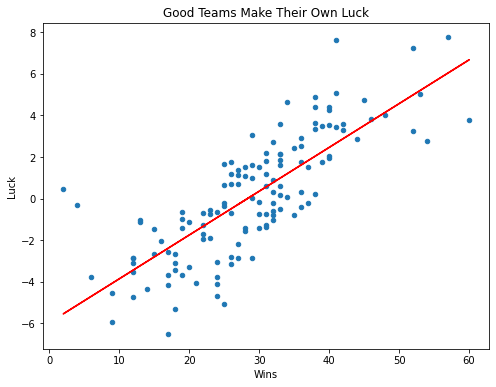

In [38]:
x = teams['Wins']
y = teams['Luck']

teams.plot.scatter(x = 'Wins', y = 'Luck', title = "Good Teams Make Their Own Luck", figsize = (8,6))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), color = "red")

plt.show()

In [56]:
games['avg_differential'] = games['point_differential'].rolling(12).mean()
games['wins_last_12_games'] = games['W_L'].rolling(12).sum()

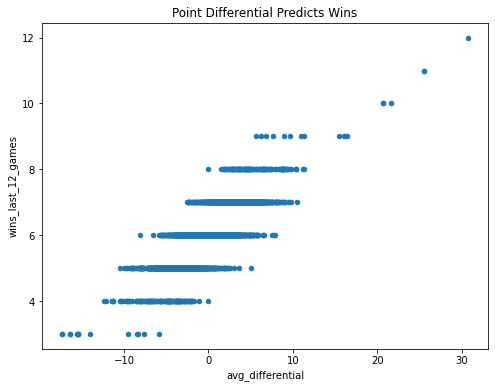

In [57]:
x = games['avg_differential']
y = games['wins_last_12_games']

games.plot.scatter(x = 'avg_differential', y = 'wins_last_12_games', title = "Point Differential Predicts Wins", figsize = (8,6))

plt.show()

In [59]:
unlucky_teams = games[(games.avg_differential > 0) & (games.wins_last_12_games < 6)]
unlucky_teams

,loss_prob,win_prob,game_id,season,season_type,week,start_date,home_team,home_conference,home_score,...,scoring_opps_opportunities_opp,scoring_opps_points_opp,scoring_opps_pts_per_opp_opp,field_pos_avg_start_opp,field_pos_avg_starting_predicted_pts_opp,W_L,point_differential,12_game_avg_differential,wins_last_12_games,avg_differential
42,0.981670,0.018330,400935236,2017,regular,1,2017-09-02T19:30:00.000Z,Northwestern,Big Ten,31,...,9,31,3.44,71.2,1.44,0,-11,2.416667,5.0,2.416667
337,0.901116,0.098884,400944842,2017,regular,4,2017-09-23T21:00:00.000Z,Louisiana,Sun Belt,50,...,8,42,5.25,71.6,1.37,0,-6,1.916667,5.0,1.916667
358,0.606929,0.393071,400945259,2017,regular,4,2017-09-23T23:00:00.000Z,Air Force,Mountain West,24,...,7,21,3.00,72.9,1.11,0,-4,0.583333,5.0,0.583333
464,0.907109,0.092891,400938626,2017,regular,5,2017-09-30T23:00:00.000Z,Southern Mississippi,Conference USA,28,...,9,30,3.33,68.1,1.53,0,-15,1.416667,5.0,1.416667
536,0.969372,0.030628,400935376,2017,regular,6,2017-10-07T19:30:00.000Z,Purdue,Big Ten,31,...,7,24,3.43,70.8,1.52,0,-14,0.083333,5.0,0.083333
538,0.742919,0.257081,400933882,2017,regular,6,2017-10-07T19:30:00.000Z,Florida,SEC,16,...,5,17,3.40,74.5,1.03,0,-1,1.166667,5.0,1.166667
618,0.783628,0.216372,400934529,2017,regular,7,2017-10-14T16:00:00.000Z,West Virginia,Big 12,46,...,7,45,6.43,70.1,1.41,0,-11,0.666667,5.0,0.666667
626,0.224356,0.775644,400934567,2017,regular,7,2017-10-14T16:00:00.000Z,Army,FBS Independents,28,...,5,21,4.20,54.1,2.58,1,1,1.000000,5.0,1.000000
758,0.905823,0.094177,400937499,2017,regular,8,2017-10-21T16:20:00.000Z,Duke,ACC,17,...,7,17,2.43,57.3,2.13,0,-7,0.916667,5.0,0.916667
868,0.992437,0.007563,400935308,2017,regular,9,2017-10-28T18:00:00.000Z,Colorado,Pac-12,44,...,6,30,5.00,72.9,1.21,0,-16,0.750000,5.0,0.750000
